# Test `tide_stn_water_level` Module

Render figure object produced by the `nowcast.figures.fvcom.tide_stn_water_level` module.
Provides data for visual testing to confirm that refactoring has not adversely changed figure for web page.

Set-up and function call replicates as nearly as possible what is done in the `nowcast.workers.make_plots` worker.

Notebooks like this should be developed in a
[Nowcast Figures Development Environment](https://salishsea-nowcast.readthedocs.io/en/latest/figures/fig_dev_env.html)
so that all of the necessary dependency packages are installed.
The development has to be done on a workstation that has the Vancouver Harbour & Fraser River FVCOM model results `/opp/` parition mounted.

In [5]:
import io
from pathlib import Path
import shlex
import subprocess

import arrow
import xarray
import yaml

from nowcast.figures.fvcom.publish import tide_stn_water_level

In [6]:
%matplotlib inline

The bits of `config/nowcast.yaml` that are required:

In [7]:
config = '''
    figures:
        dataset URLs:
            HRDPS fields: https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1
            tide stn ssh time series:
                # **Must be quoted to project {} characters**
                'https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSf{place}SSH10mV17-02'
                
    vhfr fvcom runs:
        stations dataset filename: vhfr_low_v2_station_timeseries.nc
        results archive:
            nowcast: /opp/fvcom/nowcast/
            forecast: /opp/fvcom/forecast/
'''

config = yaml.load(io.StringIO(config))

The bits that the `make_figures` worker must provide:

### Nowcast Figure

In [8]:
run_date = arrow.get('2018-11-06')
run_type = 'nowcast'

ddmmmyy = run_date.format('DDMMMYY').lower()
fvcom_ssh_dataset_filename = config['vhfr fvcom runs']['stations dataset filename']

if run_type == 'nowcast':
    results_dir = Path(
        config['vhfr fvcom runs']['results archive'][run_type], ddmmmyy
    )
    fvcom_ssh_dataset_path = results_dir / fvcom_ssh_dataset_filename
else:
    nowcast_results_dir = Path(
        config['vhfr fvcom runs']['results archive']['nowcast'], ddmmmyy
    )
    nowcast_dataset_path = (nowcast_results_dir/fvcom_ssh_dataset_filename)
    forecast_results_dir = Path(
        config['vhfr fvcom runs']['results archive']['forecast'], ddmmmyy
    )
    forecast_dataset_path = (forecast_results_dir/fvcom_ssh_dataset_filename)
    fvcom_ssh_dataset_path = Path(
        '/tmp/vhfr_low_v2_station_timeseries_forecast.nc')
    cmd = (
        f'ncrcat -O {nowcast_dataset_path} {forecast_dataset_path} '
        f'-o {fvcom_ssh_dataset_path}'
    )
    subprocess.check_output(shlex.split(cmd))

cmd = (
    f'ncrename -O -v siglay,sigma_layer -v siglev,sigma_level '
    f'{fvcom_ssh_dataset_path} /tmp/{fvcom_ssh_dataset_path.name}')
subprocess.check_output(shlex.split(cmd))
fvcom_ssh_dataset = xarray.open_dataset(f'/tmp/{fvcom_ssh_dataset_path.name}')

nemo_ssh_dataset_url_tmpl = config['figures']['dataset URLs']['tide stn ssh time series']

/media/doug/warehouse/conda_envs/nowcast-fig-dev/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


2min 27s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


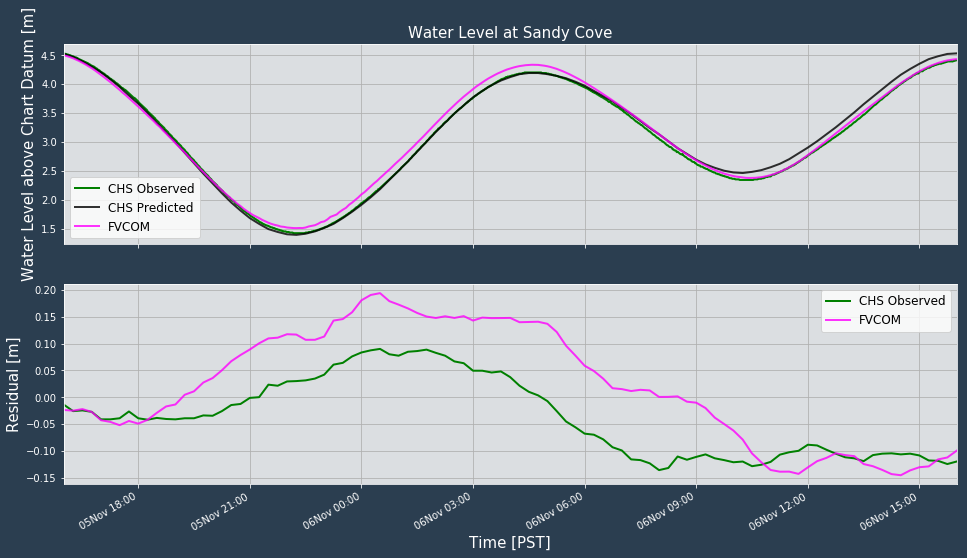

In [9]:
%%timeit -n1 -r1

from importlib import reload
reload(tide_stn_water_level)

fig = tide_stn_water_level.make_figure('Sandy Cove', fvcom_ssh_dataset, nemo_ssh_dataset_url_tmpl)

9min 54s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


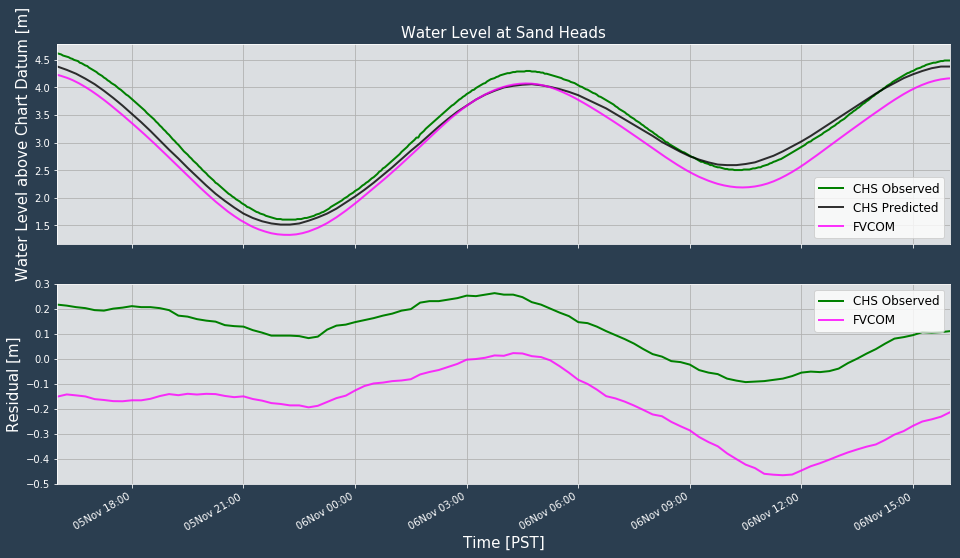

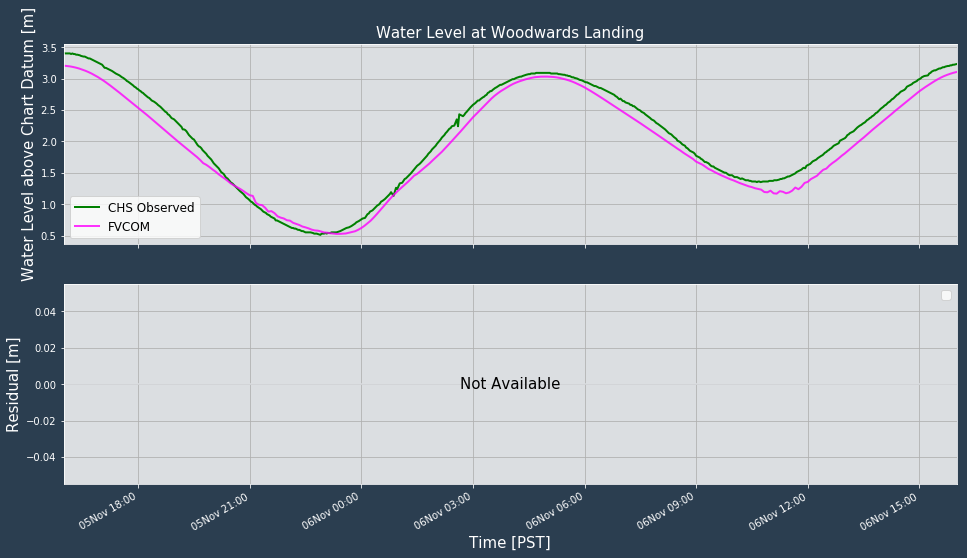

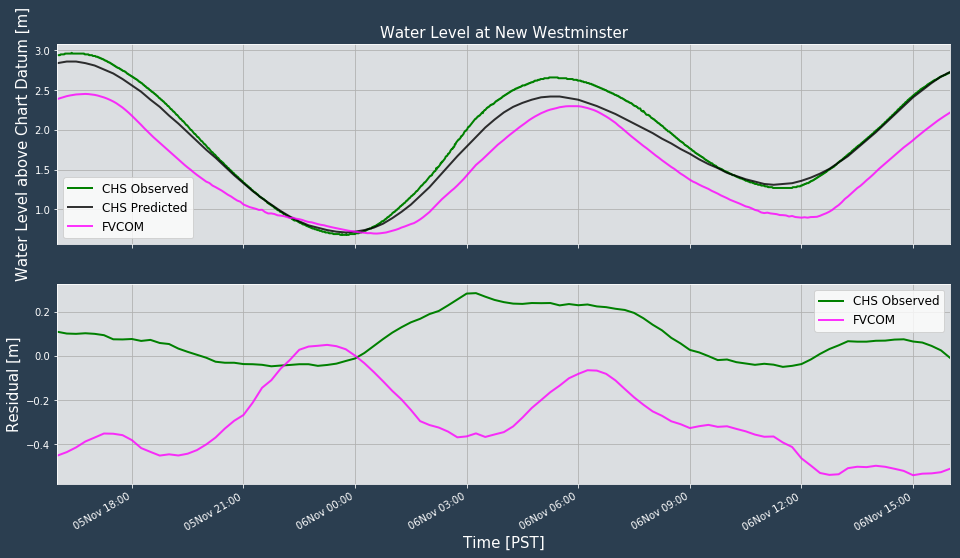

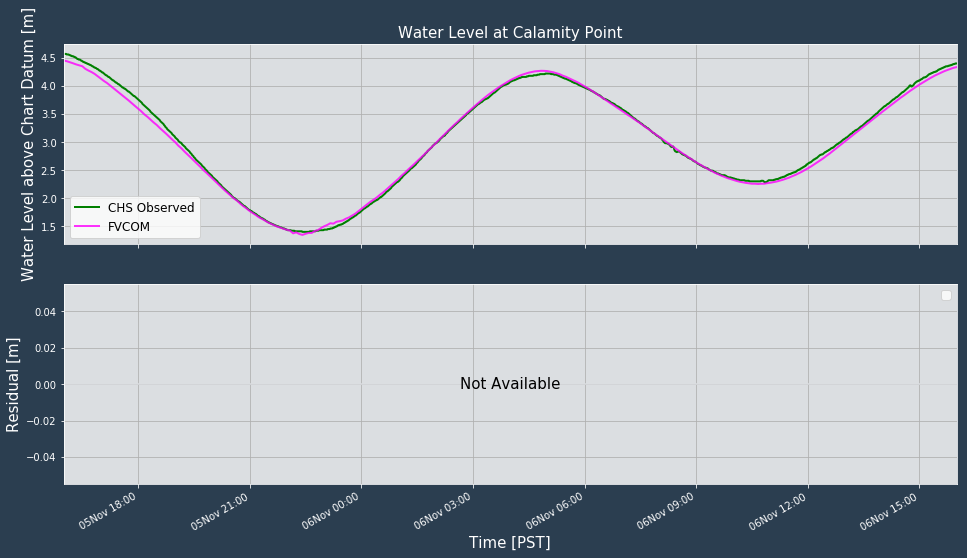

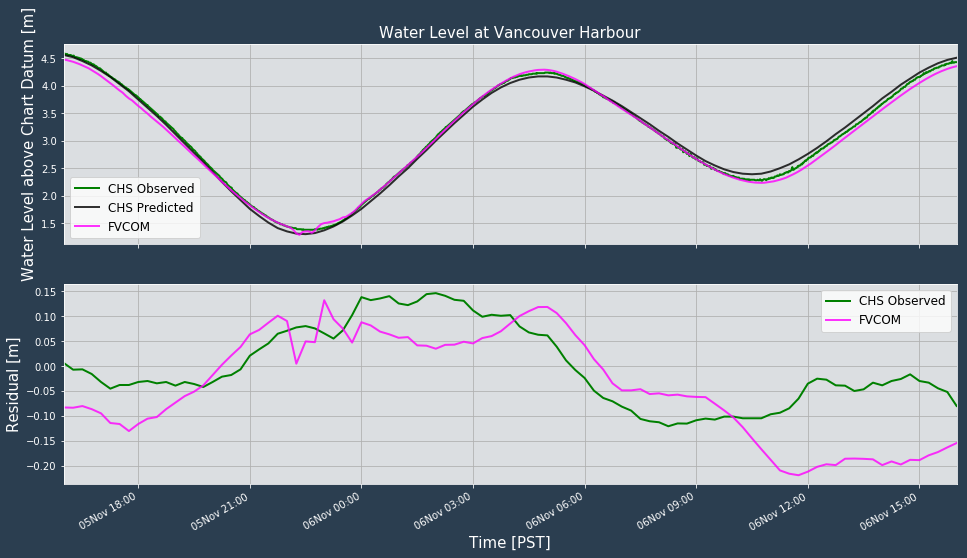

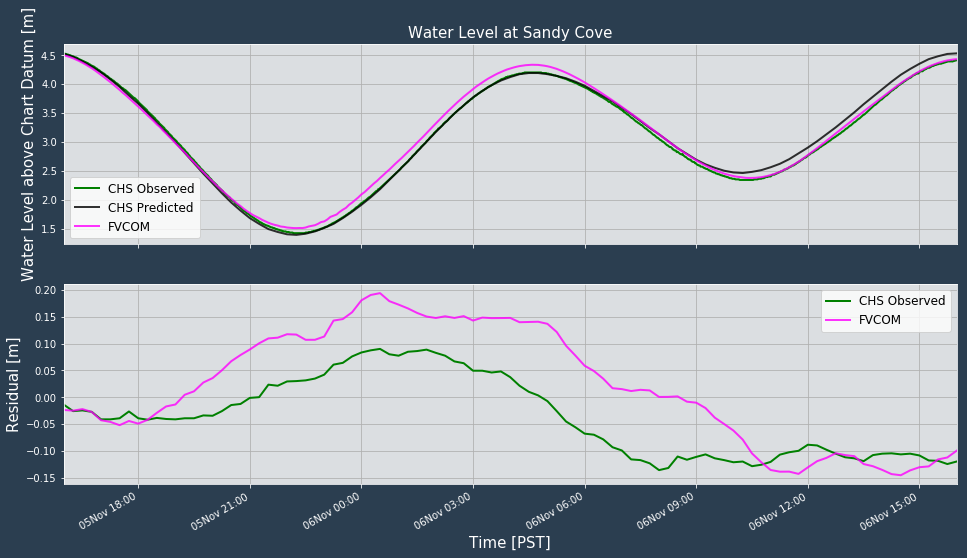

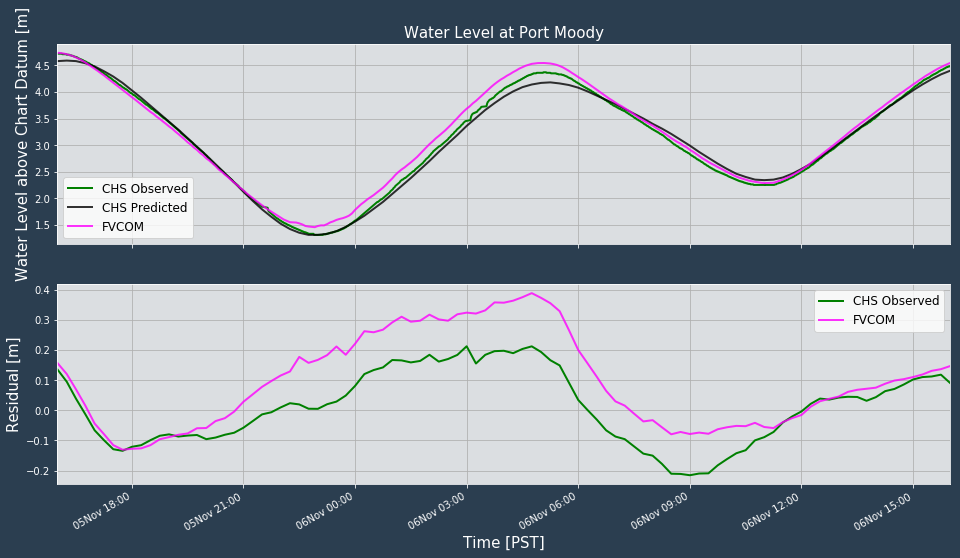

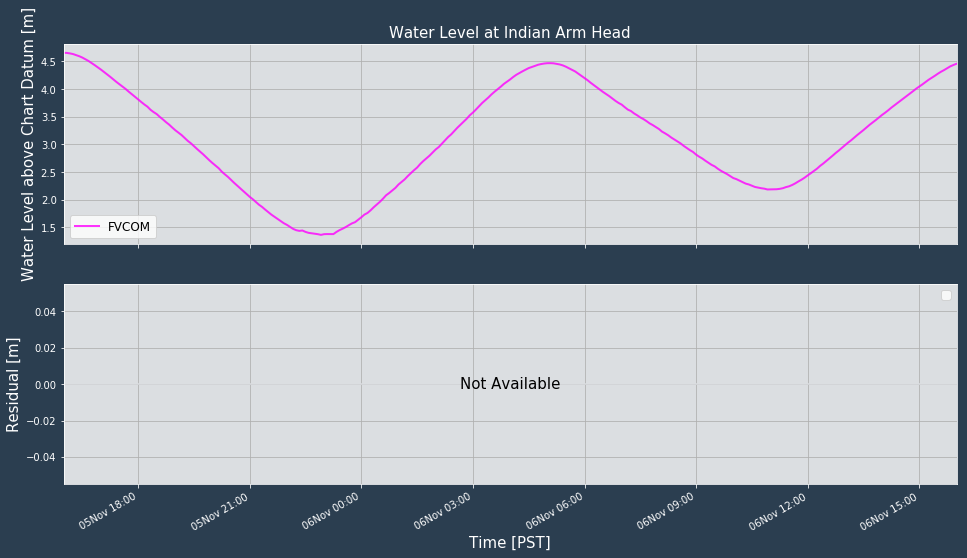

In [10]:
%%timeit -n1 -r1

from importlib import reload
reload(tide_stn_water_level)

stations = [
    name.decode().strip().split(maxsplit=1)[1]
    for name in fvcom_ssh_dataset.name_station.values
]
stations.remove('2nd Narrows')
for station in stations:
    fig = tide_stn_water_level.make_figure(station, fvcom_ssh_dataset, nemo_ssh_dataset_url_tmpl)

### Forecast Figure

In [11]:
run_date = arrow.get('2018-11-06')
run_type = 'forecast'

ddmmmyy = run_date.format('DDMMMYY').lower()
fvcom_ssh_dataset_filename = config['vhfr fvcom runs']['stations dataset filename']

if run_type == 'nowcast':
    results_dir = Path(
        config['vhfr fvcom runs']['results archive'][run_type], ddmmmyy
    )
    fvcom_ssh_dataset_path = results_dir / fvcom_ssh_dataset_filename
else:
    nowcast_results_dir = Path(
        config['vhfr fvcom runs']['results archive']['nowcast'], ddmmmyy
    )
    nowcast_dataset_path = (nowcast_results_dir/fvcom_ssh_dataset_filename)
    forecast_results_dir = Path(
        config['vhfr fvcom runs']['results archive']['forecast'], ddmmmyy
    )
    forecast_dataset_path = (forecast_results_dir/fvcom_ssh_dataset_filename)
    fvcom_ssh_dataset_path = Path(
        '/tmp/vhfr_low_v2_station_timeseries_forecast.nc')
    cmd = (
        f'ncrcat -O {nowcast_dataset_path} {forecast_dataset_path} '
        f'-o {fvcom_ssh_dataset_path}'
    )
    subprocess.check_output(shlex.split(cmd))

cmd = (
    f'ncrename -O -v siglay,sigma_layer -v siglev,sigma_level '
    f'{fvcom_ssh_dataset_path} /tmp/{fvcom_ssh_dataset_path.name}')
subprocess.check_output(shlex.split(cmd))
fvcom_ssh_dataset = xarray.open_dataset(f'/tmp/{fvcom_ssh_dataset_path.name}')

nemo_ssh_dataset_url_tmpl = config['figures']['dataset URLs']['tide stn ssh time series']

2min 12s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


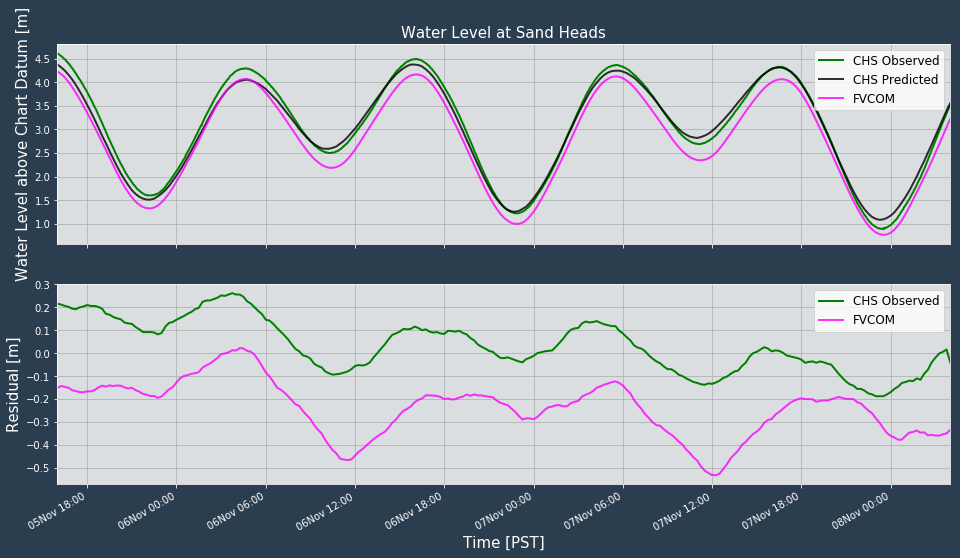

In [12]:
%%timeit -n1 -r1

from importlib import reload
reload(tide_stn_water_level)

fig = tide_stn_water_level.make_figure('Sand Heads', fvcom_ssh_dataset, nemo_ssh_dataset_url_tmpl)

17min 57s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


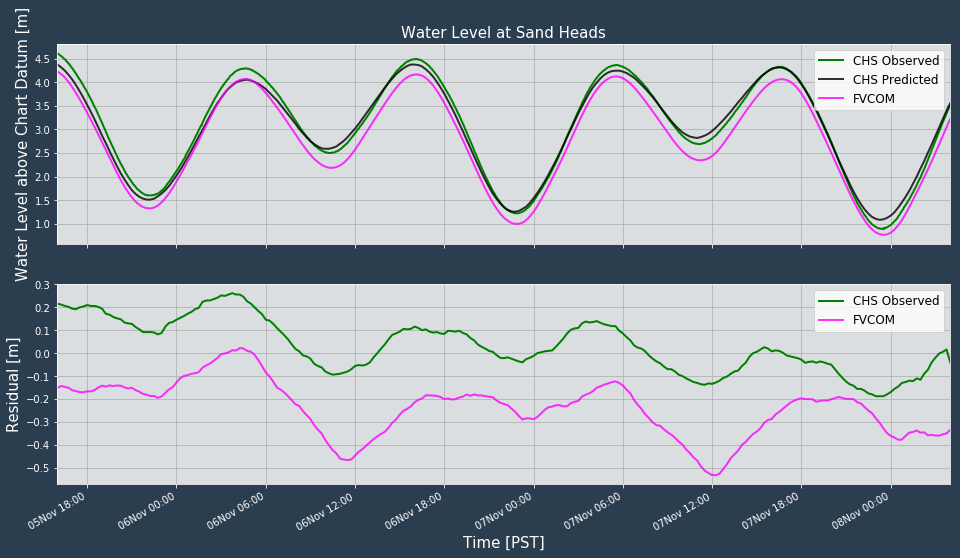

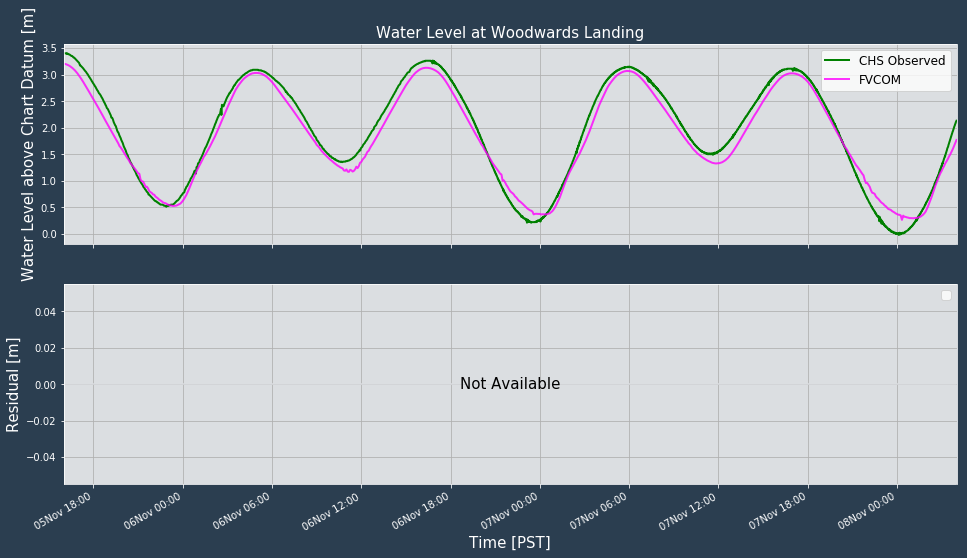

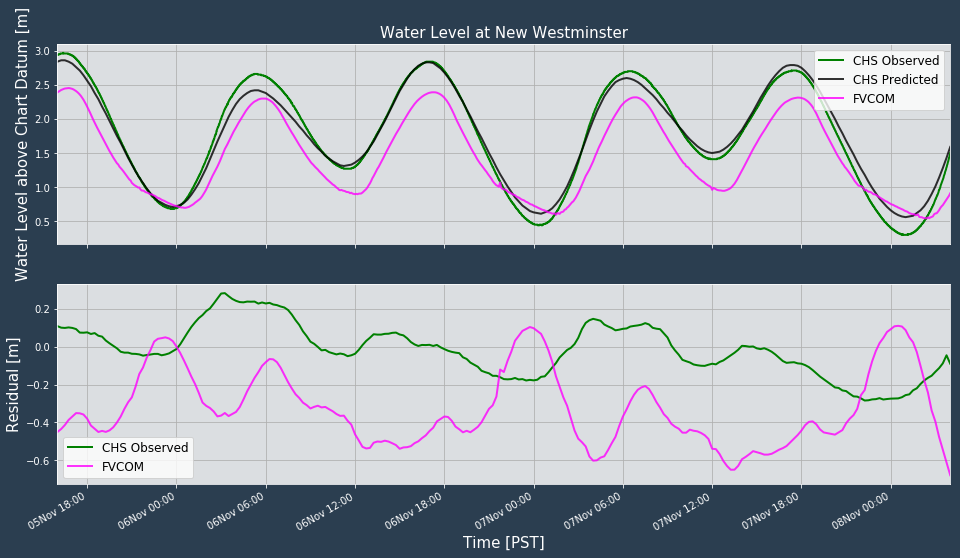

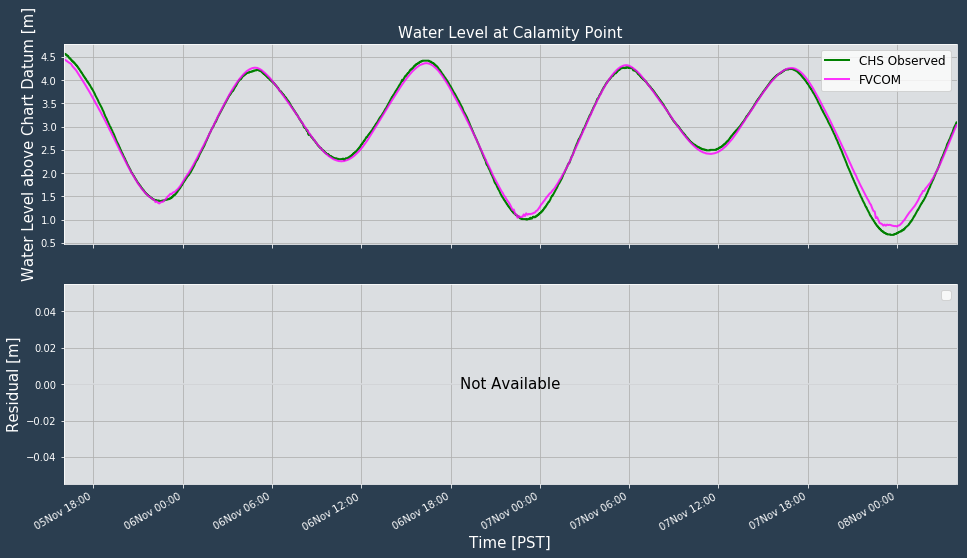

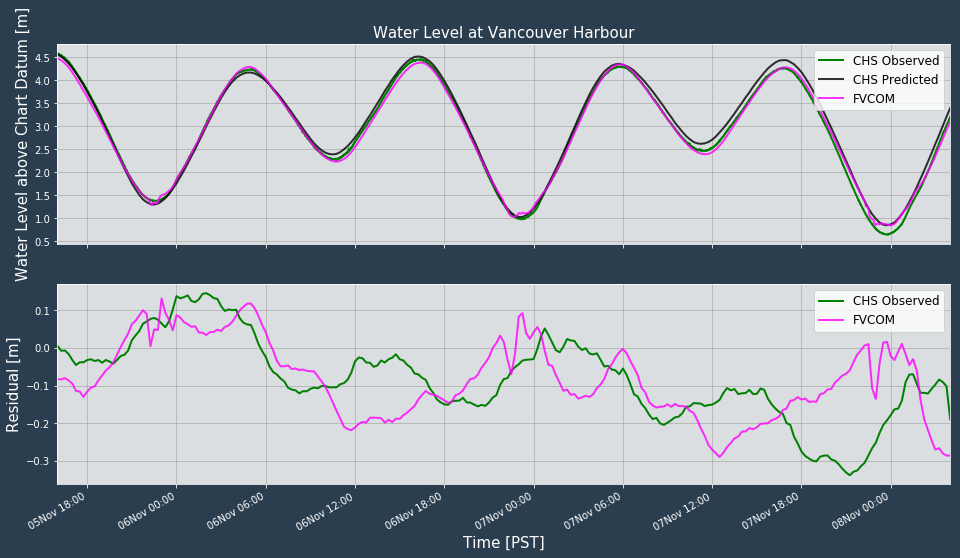

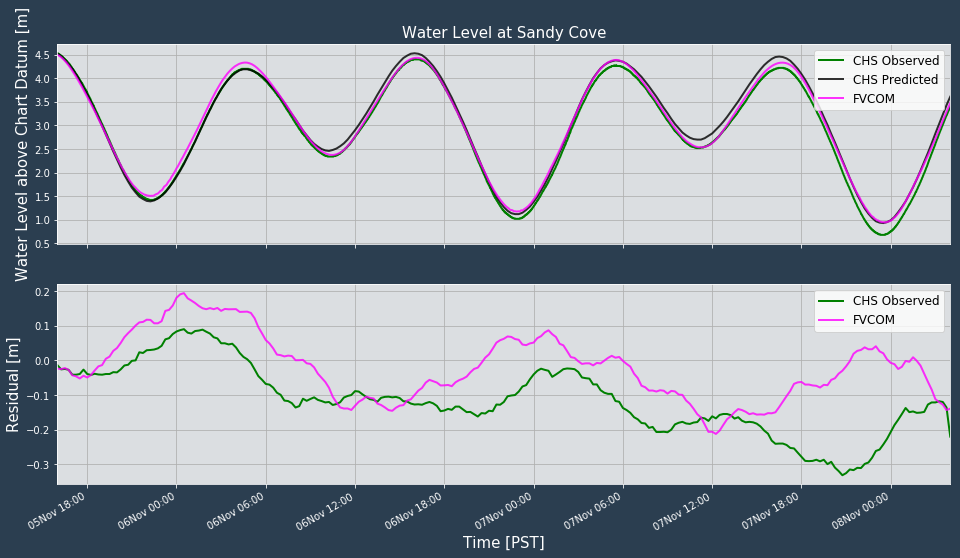

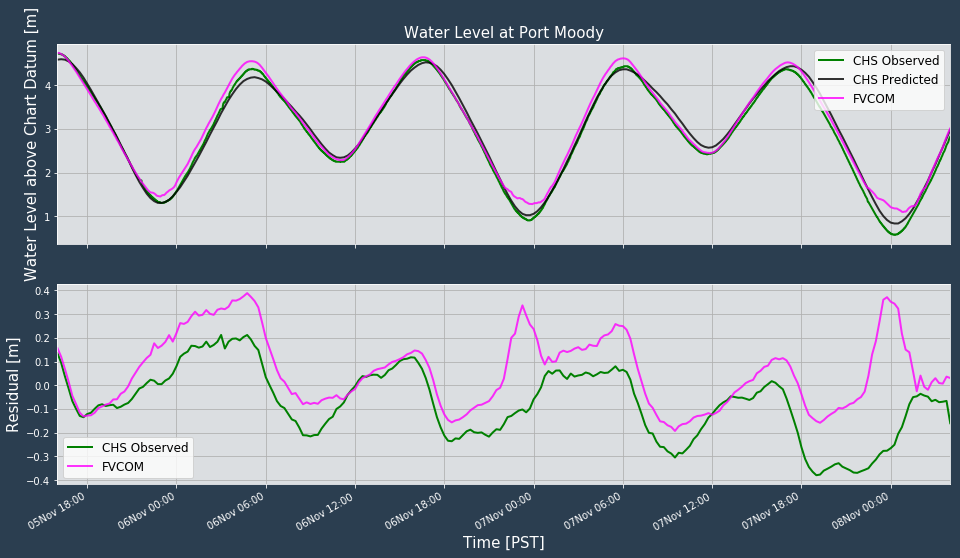

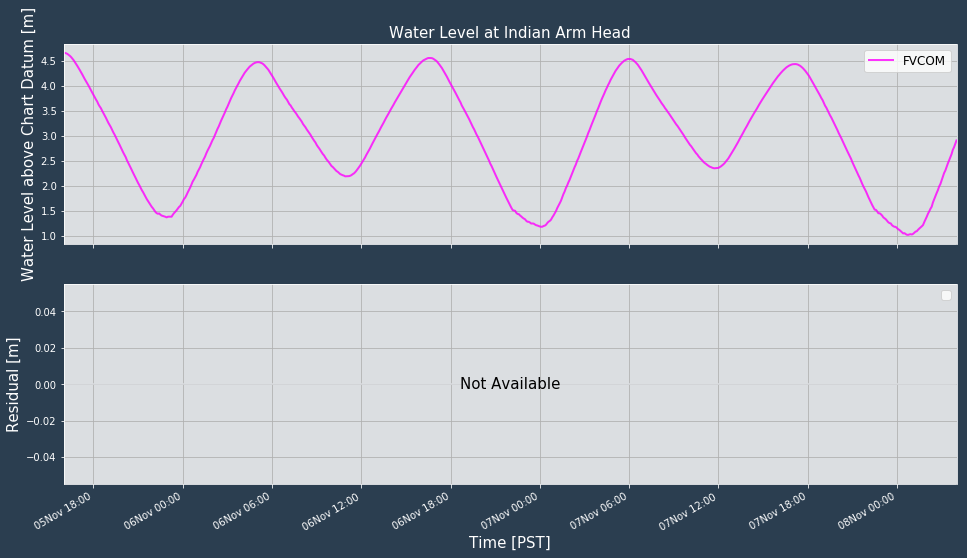

In [13]:
%%timeit -n1 -r1

from importlib import reload
reload(tide_stn_water_level)

stations = [
    name.decode().strip().split(maxsplit=1)[1]
    for name in fvcom_ssh_dataset.name_station.values
]
stations.remove('2nd Narrows')
for station in stations:
    fig = tide_stn_water_level.make_figure(station, fvcom_ssh_dataset, nemo_ssh_dataset_url_tmpl)